In [15]:
from scipy import io
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("seaborn")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.decomposition import PCA

from tqdm import tqdm

from matplotlib import cm

In [2]:
def get_data(filename):
    nx = 40
    nt = 40
    data = np.load(filename)
    x = data["x"].astype(np.float64)
    t = data["t"].astype(np.float64)
    u = data["u"].astype(np.float64)  # N x nt x nx

    u0 = u[:, 0, :]  # N x nx
    xt = np.vstack((np.ravel(x), np.ravel(t))).T
    return u0, u[:, int(nt/2), :], xt
    
    #u = u.reshape(-1, nt * nx)
    return u0 , u, xt

In [3]:
x_train, y_train, xt= get_data("train_IC1.npz")
x_test, y_test, xt = get_data("test_IC1.npz")

x_train.shape, y_train.shape, xt.shape

((1000, 40), (1000, 40), (1600, 2))

# Plotting: piecewise constant problem

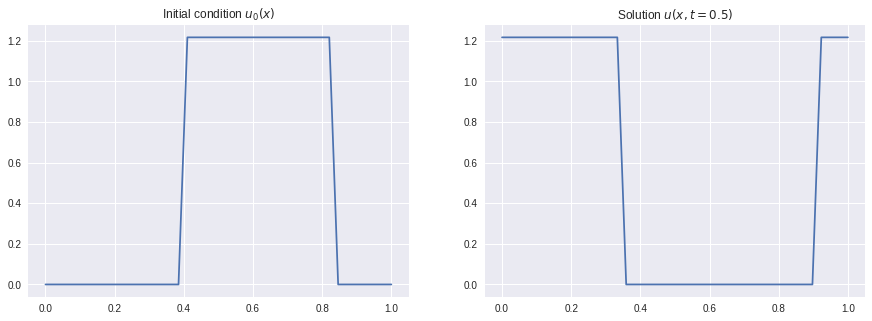

In [4]:
idx = 20

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

ax1.plot(np.linspace(0,1, 40), x_train[idx])
ax1.set_title(r"Initial condition $u_0(x)$")

ax2.plot(np.linspace(0,1, 40), y_train[idx])
ax2.set_title(r"Solution $u(x, t = 0.5)$")

plt.show()

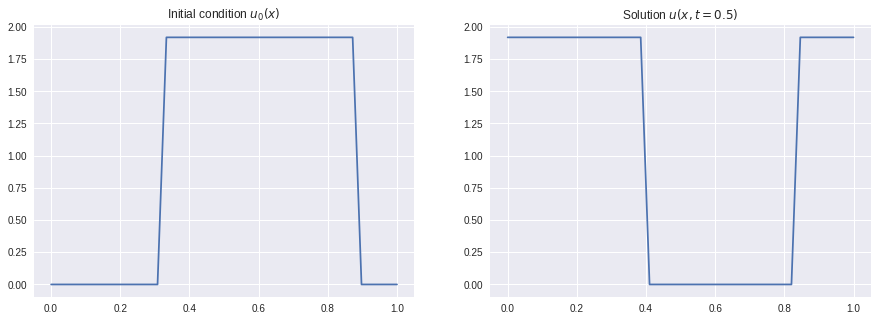

In [5]:
idx = 20

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

ax1.plot(np.linspace(0,1, 40), x_test[idx])
ax1.set_title(r"Initial condition $u_0(x)$")

ax2.plot(np.linspace(0,1, 40), y_test[idx])
ax2.set_title(r"Solution $u(x, t = 0.5)$")

plt.show()

# Linear regression

In [6]:
def train_test(x_train, x_test, y_train, y_test, n_pca, model):
    # Compute the PCA decoposition
    pca = PCA(n_components=n_pca)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    
    model.fit(x_train_pca, y_train)
    pred= model.predict(x_test_pca)
    #pred_train = gp.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, model

In [7]:
model = LinearRegression()

n_pca = 10

pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

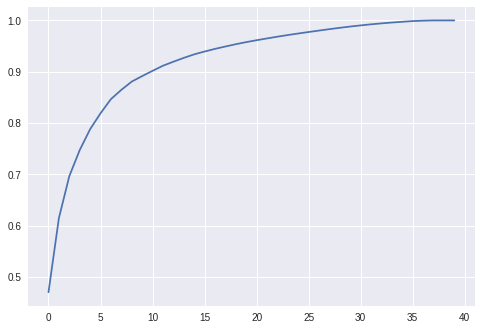

18

In [8]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]

In [9]:
pca_modes = np.arange(1, 40)
errors = []
for n_pca in pca_modes:
    pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    errors.append(e)

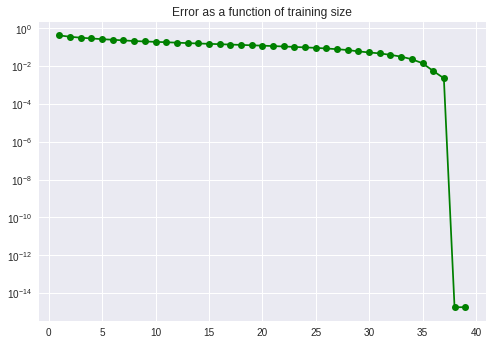

In [10]:
plt.figure()
plt.plot(pca_modes,errors, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")
plt.show()

In [11]:
best = np.argmin(errors)
pca_modes[best]

38

In [12]:
n_pca = pca_modes[best]

pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e

1.792382860718637e-15

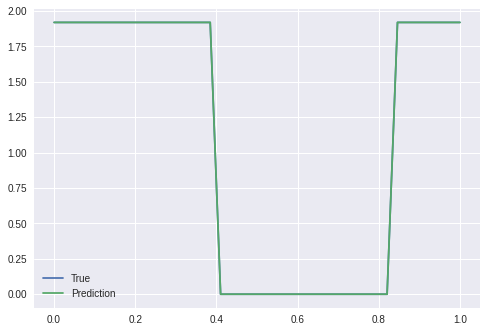

In [13]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

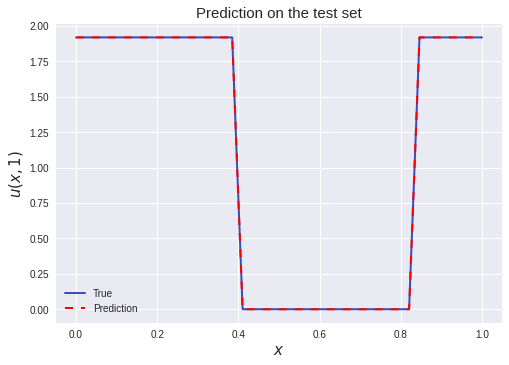

In [16]:
grid = np.linspace(0,1, 40)
plt.plot(grid, y_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
plt.plot(grid, pred[idx],  label = "Prediction", linestyle='--',dashes=(4, 4), color = 'red',  linewidth=2.0)
plt.xlabel(r'$x$', size= 15)
plt.ylabel(r'$u(x, 1)$', size= 15)
plt.title("Prediction on the test set", size = 15)
plt.legend()

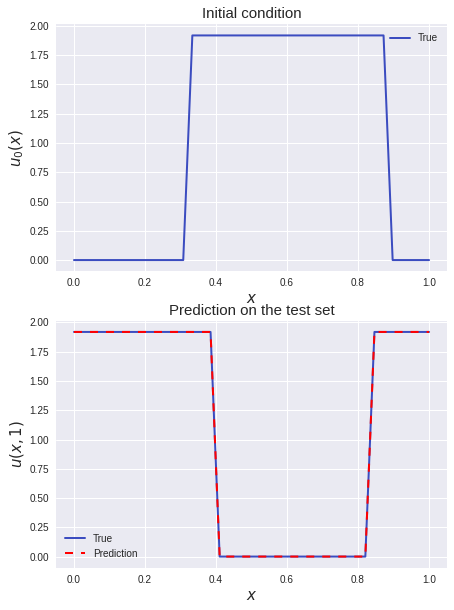

In [30]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (7,10))
ax1.plot(grid, x_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
ax1.set_xlabel(r'$x$', size= 15)
ax1.set_ylabel(r'$u_0(x)$', size= 15)
ax1.set_title("Initial condition", size = 15)
ax1.legend()

ax2.plot(grid, y_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
ax2.plot(grid, pred[idx],  label = "Prediction", linestyle='--',dashes=(4, 4), color = 'red',  linewidth=2.0)
ax2.set_xlabel(r'$x$', size= 15)
ax2.set_ylabel(r'$u(x, 1)$', size= 15)
ax2.set_title("Prediction on the test set", size = 15)
ax2.legend()

# Ridge regression

In [58]:
model = Ridge(alpha = 1e-5)

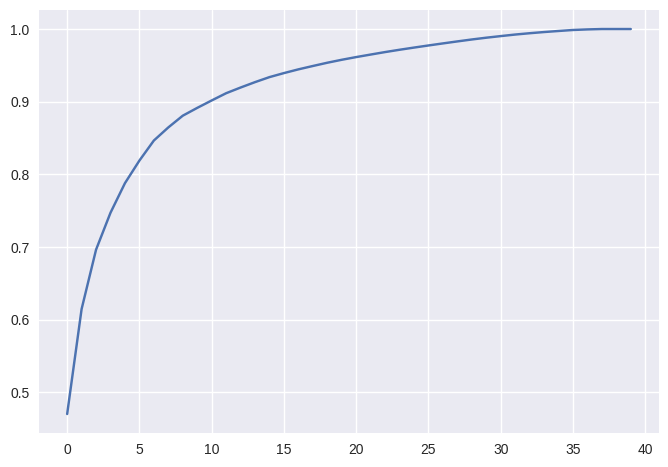

18

In [59]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]

In [60]:
pca_modes = np.arange(1, 40)
errors = []
for n_pca in pca_modes:
    pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    errors.append(e)

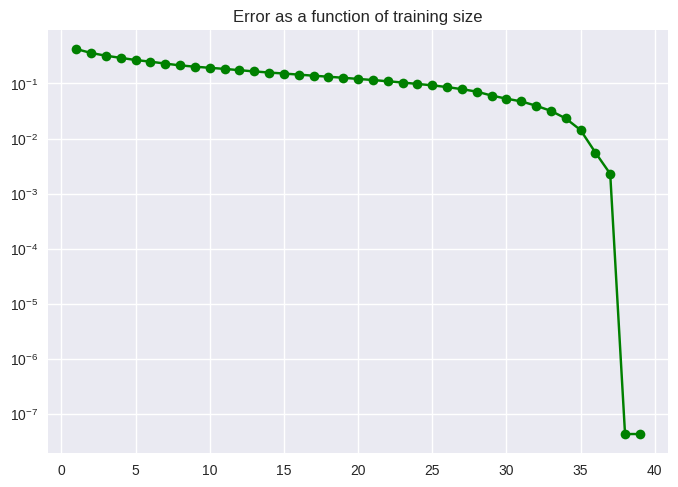

In [61]:
plt.figure()
plt.plot(pca_modes,errors, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")
plt.show()

In [62]:
best = np.argmin(errors)
pca_modes[best]

38

In [63]:
n_pca = pca_modes[best]

pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e

4.3164233319751483e-08

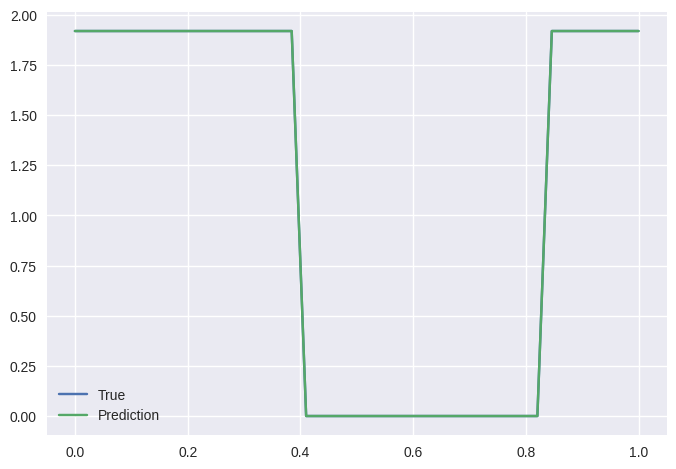

In [64]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

In [65]:
model

Ridge(alpha=1e-05)

# Polynomial Regression: quadratic

In [89]:
def train_test(x_train, x_test, y_train, y_test, model):
    
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    #pred_train = gp.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, model

In [90]:
poly = PolynomialFeatures(2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model = LinearRegression()

In [91]:
x_train_poly.shape[-1], x_train_poly.shape

(861, (1000, 861))

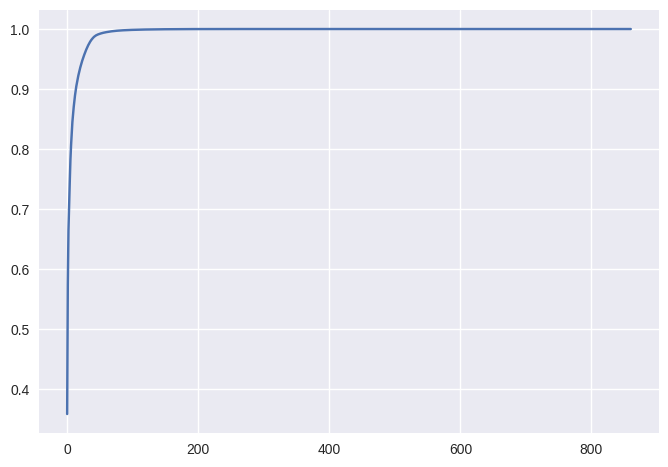

In [93]:
pca = PCA(n_components=x_train_poly.shape[-1])

x_train_pca = pca.fit_transform(x_train_poly)
x_test_pca = pca.transform(x_test_poly)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

n_pca = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]

In [94]:
pca_modes = np.arange(1, x_train_poly.shape[-1])
errors = []
for n_pca in pca_modes:
    pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    errors.append(e)

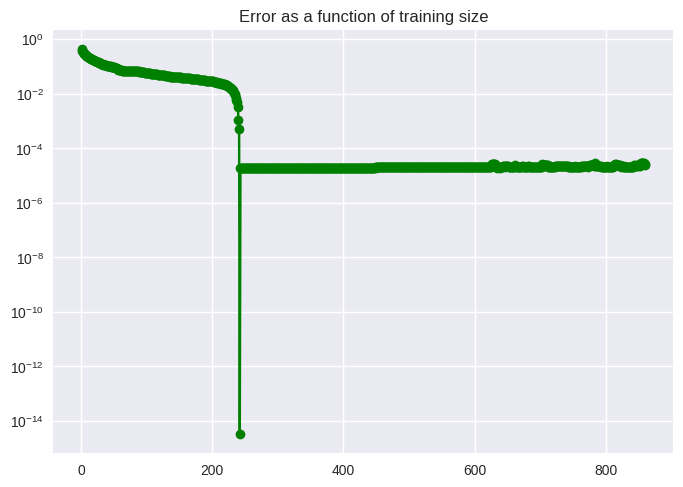

In [95]:
plt.figure()
plt.plot(pca_modes,errors, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")
plt.show()

In [97]:
best = np.argmin(errors)
pca_modes[best]

242

In [98]:
n_pca = pca_modes[best]

pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(3.2773793803381103e-15, LinearRegression())

In [100]:
x_train_pca[:, :n_pca].shape

(1000, 242)

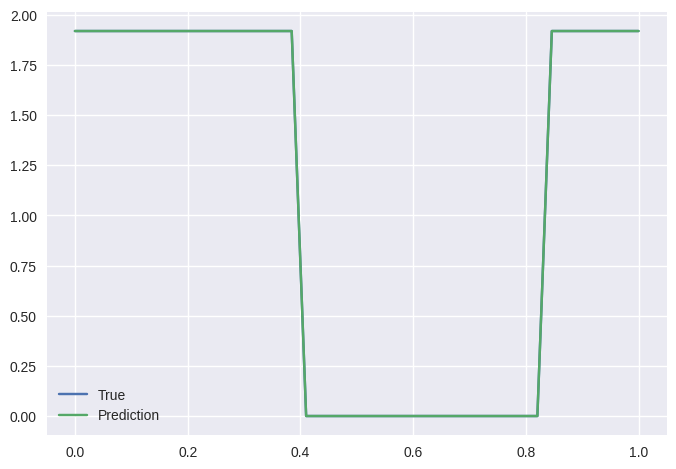

In [99]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

# Gaussian Process: Matern 2.5

In [155]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

In [156]:
kernel = Matern(nu = 2.5)
#kernel = RBF()
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

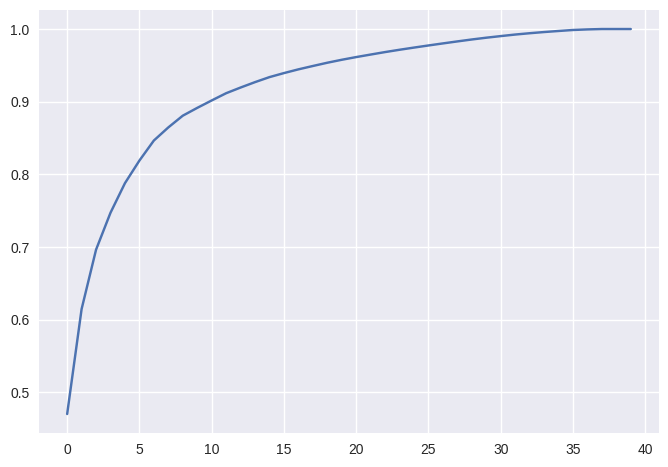

30

In [157]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

n_pca = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]
n_pca

In [158]:
pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.004613196957747309,
 GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=2.5)))

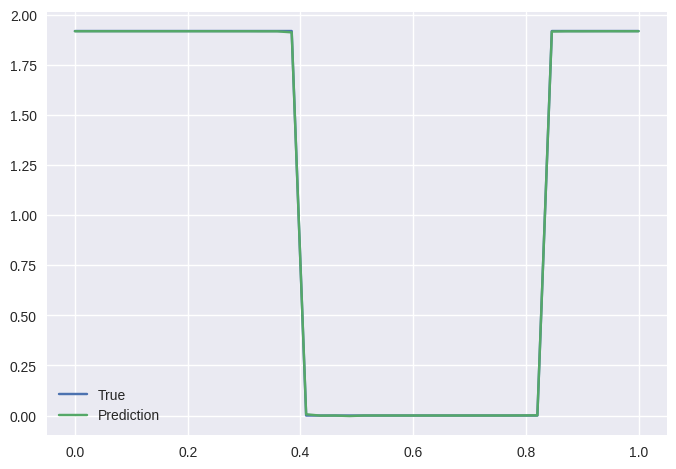

In [159]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

In [160]:
pred, model = train_test(x_train, x_test, y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(3.1949378517415276e-05,
 GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=2.5)))

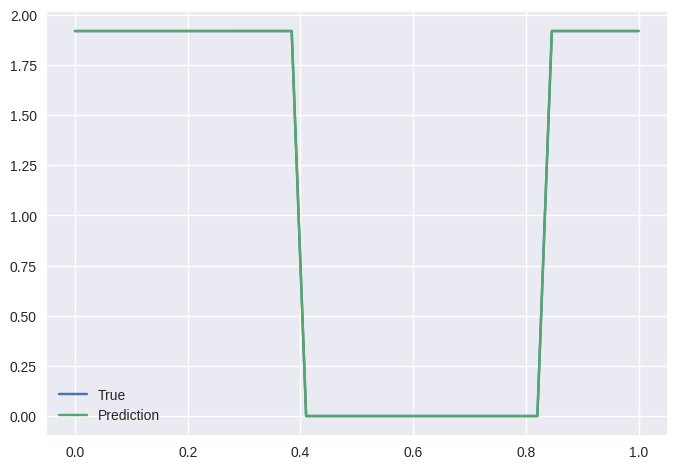

In [161]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

# Gaussian Process: RBF

In [147]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

In [148]:
#kernel = Matern(nu = 2.5)
kernel = RBF()
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

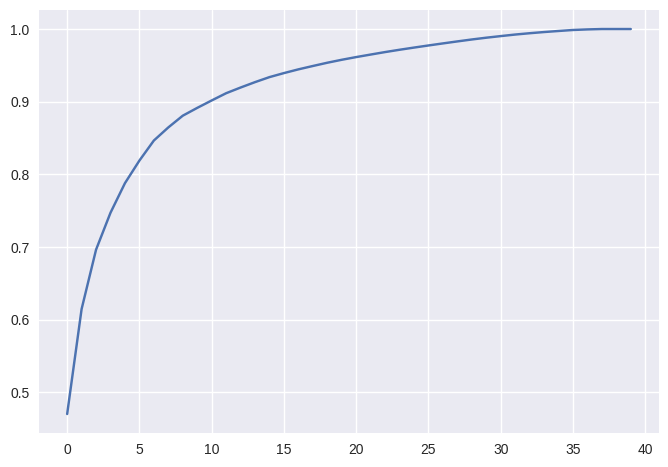

30

In [149]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

n_pca = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]
n_pca

In [150]:
pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.0028527050697916244, GaussianProcessRegressor(kernel=RBF(length_scale=1)))

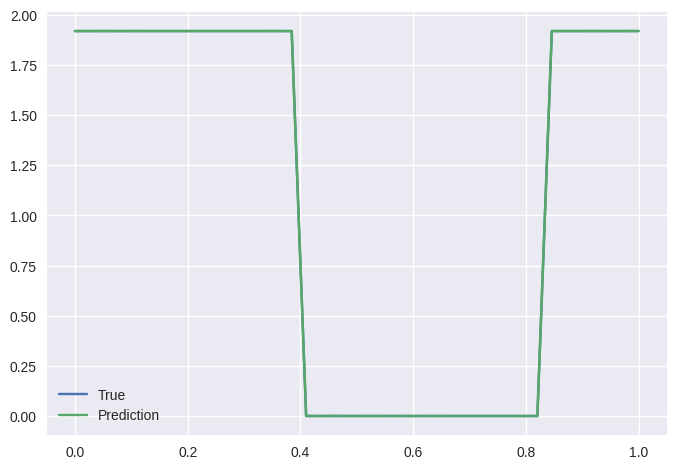

In [151]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

In [152]:
pred, model = train_test(x_train, x_test, y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

/home/matthieudarcy/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


(2.0816556778099376e-05, GaussianProcessRegressor(kernel=RBF(length_scale=1)))

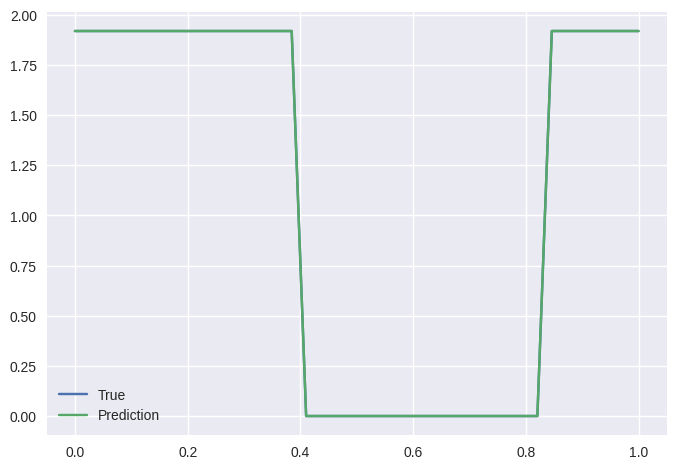

In [153]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

# Gaussian Process: Rational Quadratic

In [162]:
kernel = RationalQuadratic()
#kernel = RBF()
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

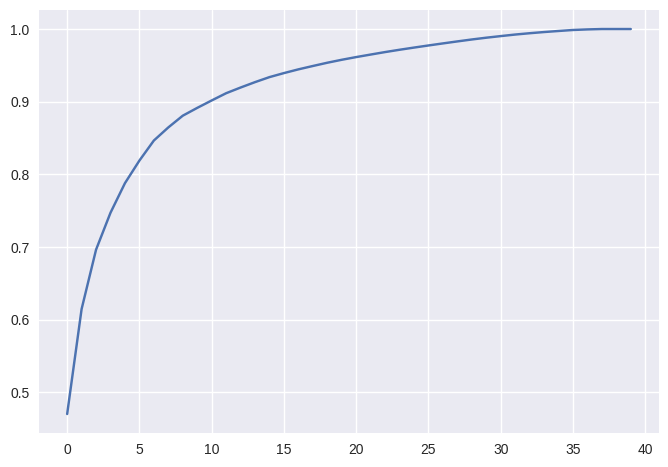

30

In [163]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

n_pca = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]
n_pca

In [164]:
pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.02363656362955203,
 GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1)))

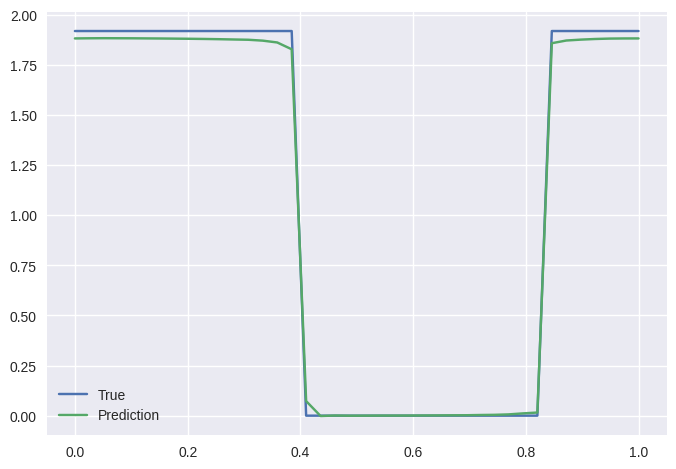

In [165]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

In [166]:
pred, model = train_test(x_train, x_test, y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.0222583054863956,
 GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1)))

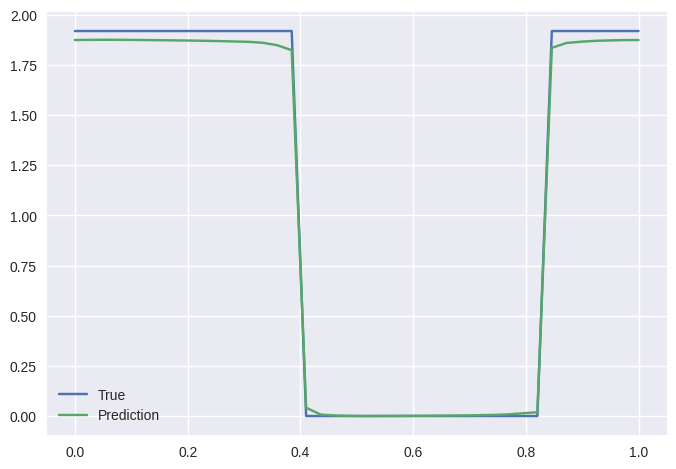

In [167]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

# Gaussian Process: Exponential

In [168]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

In [181]:
kernel = Matern(nu = 0.5)
#kernel = RBF()
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

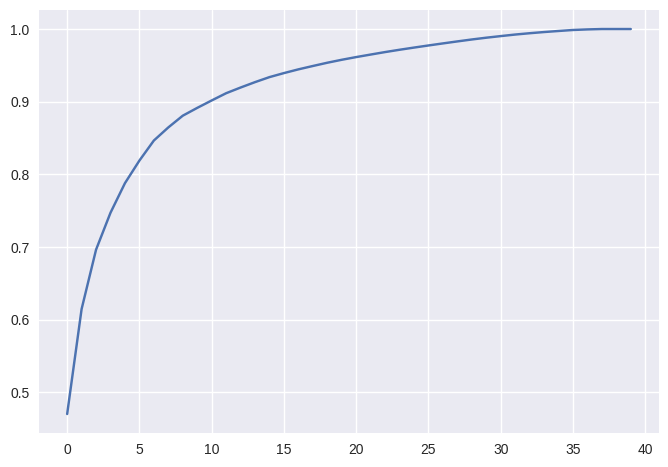

30

In [182]:
pca = PCA(n_components=x_train.shape[-1])

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

n_pca = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]
n_pca

In [183]:
pred, model = train_test(x_train_pca[:, :n_pca], x_test_pca[:, :n_pca], y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.01828880475969525,
 GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=0.5)))

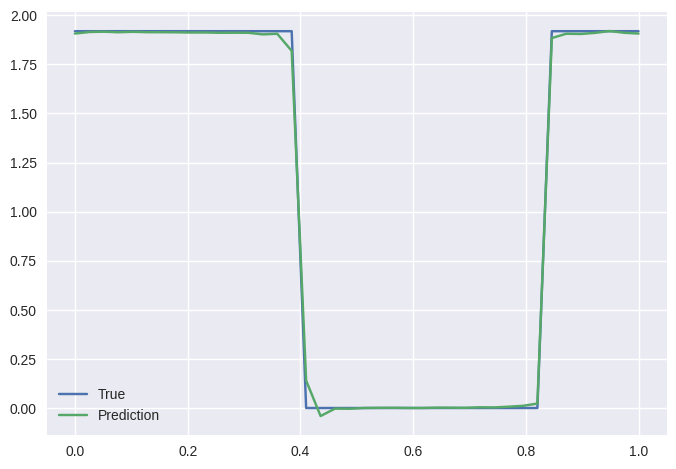

In [184]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

In [185]:
pred, model = train_test(x_train, x_test, y_train, y_test,model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e, model

(0.009719656758173907,
 GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=0.5)))

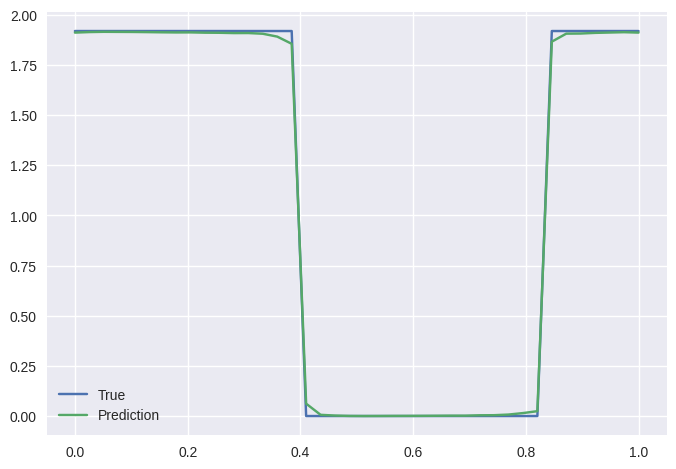

In [186]:
idx = 20

plt.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
plt.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
plt.legend()
plt.show()

# Averaging over datasets

## Linear regression

In [44]:
def train_test(x_train, x_test, y_train, y_test, model):
    
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    pred_train = model.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, pred_train,model

In [45]:
x_train, y_train, xt= get_data("train_IC1.npz")
x_test, y_test, xt = get_data("test_IC1.npz")

x_train.shape, y_train.shape, xt.shape

((1000, 40), (1000, 40), (1600, 2))

In [46]:
model = LinearRegression()

pred, pred_train, model = train_test(x_train, x_test, y_train, y_test, model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e

1.697654137373313e-15

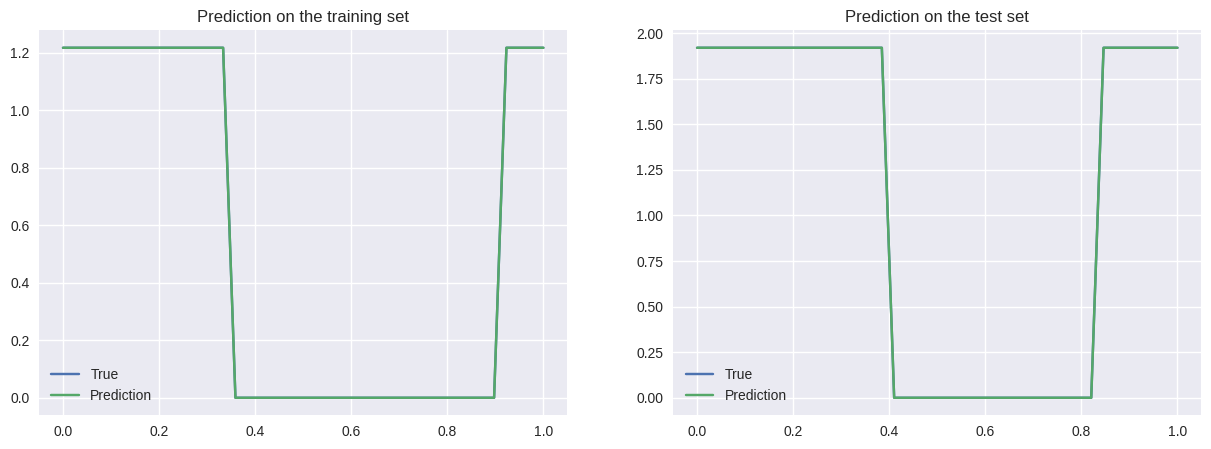

In [49]:
idx = 20

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

ax1.plot(np.linspace(0,1, 40), y_train[idx], label = "True")
ax1.plot(np.linspace(0,1, 40), pred_train[idx], label = "Prediction")
ax1.legend()
ax1.set_title(r"Prediction on the training set")

ax2.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
ax2.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
ax2.set_title(r"Prediction on the test set")
ax2.legend()

plt.show()

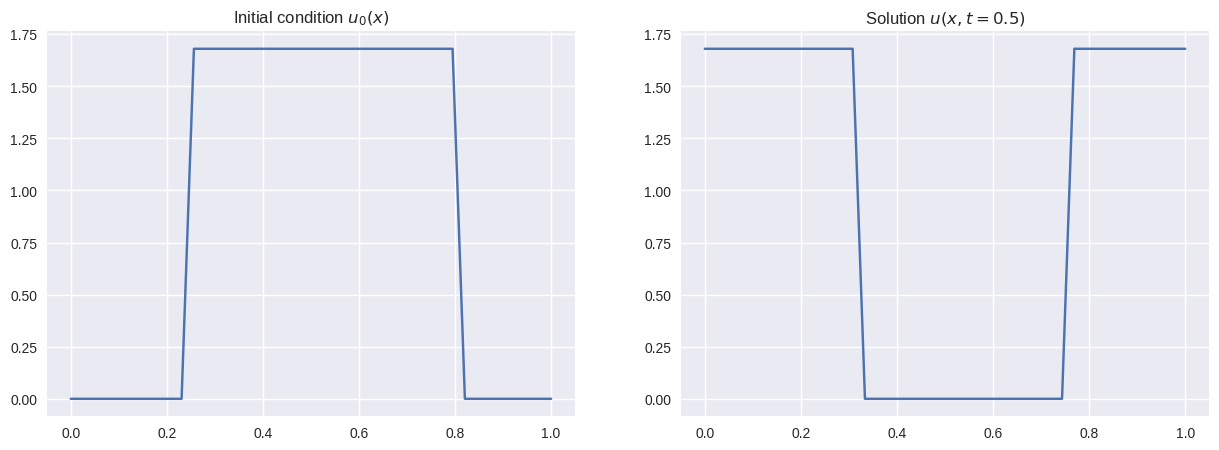

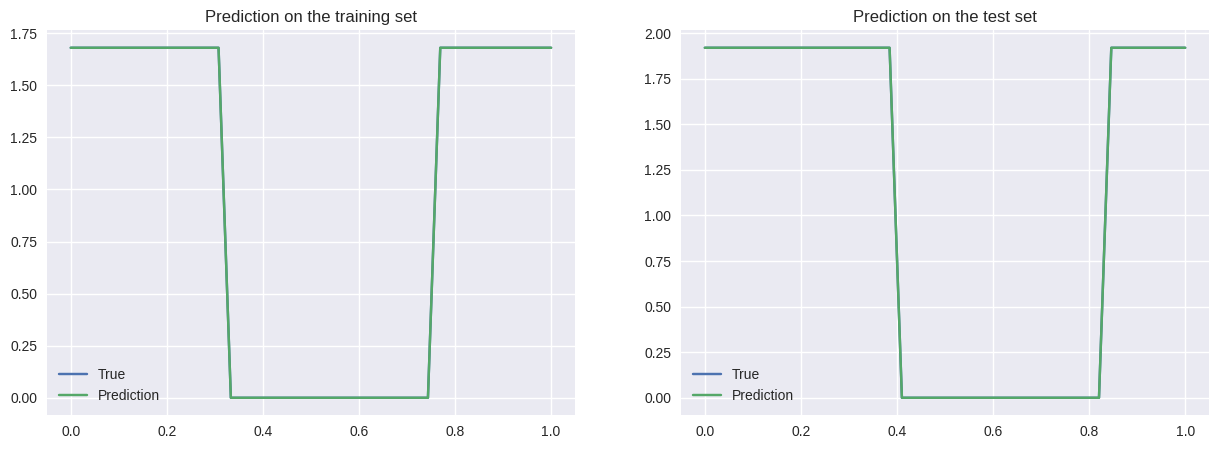

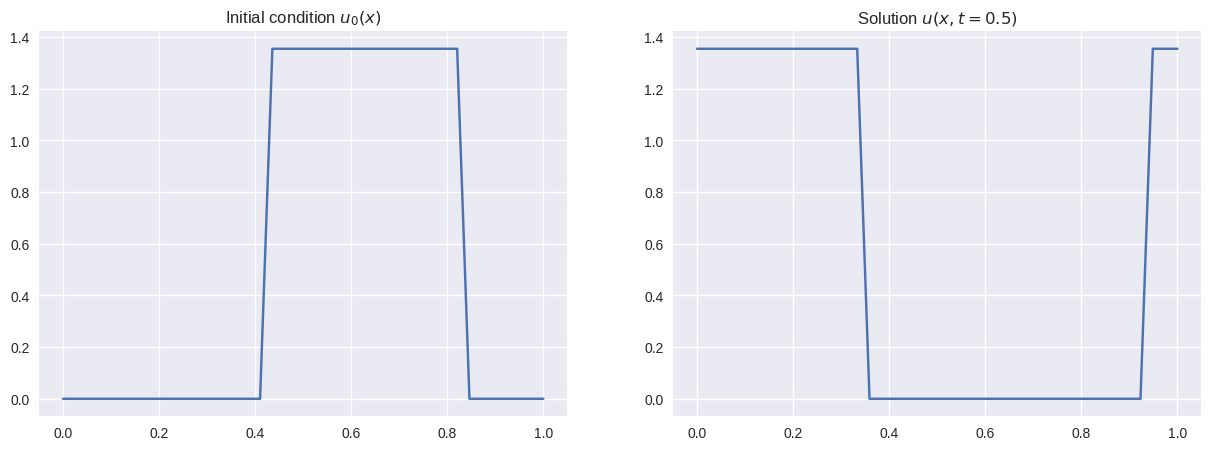

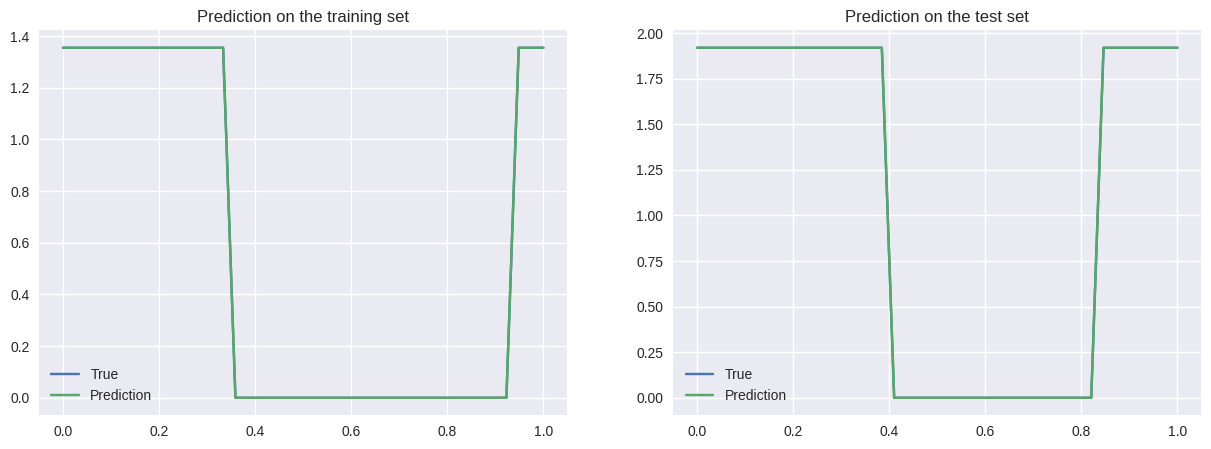

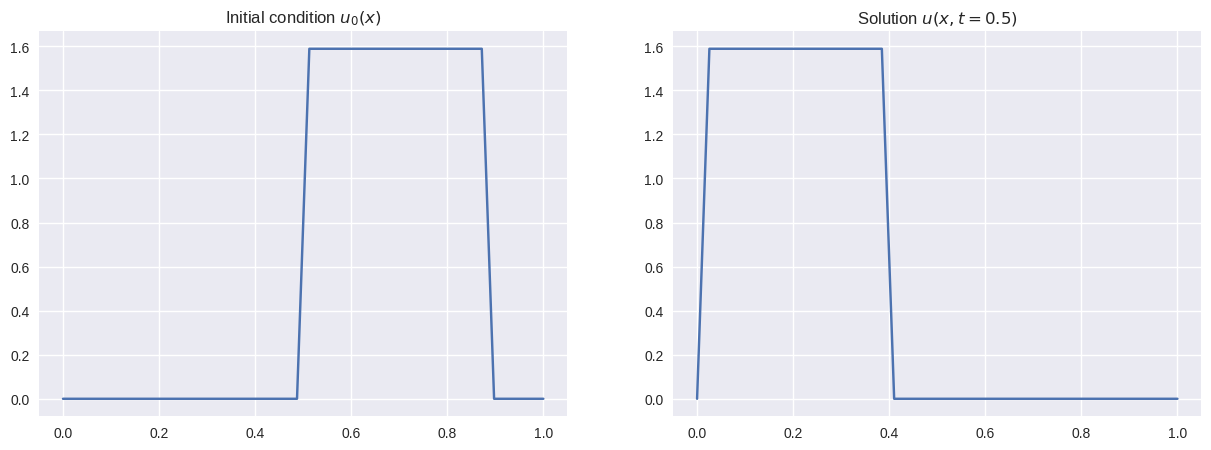

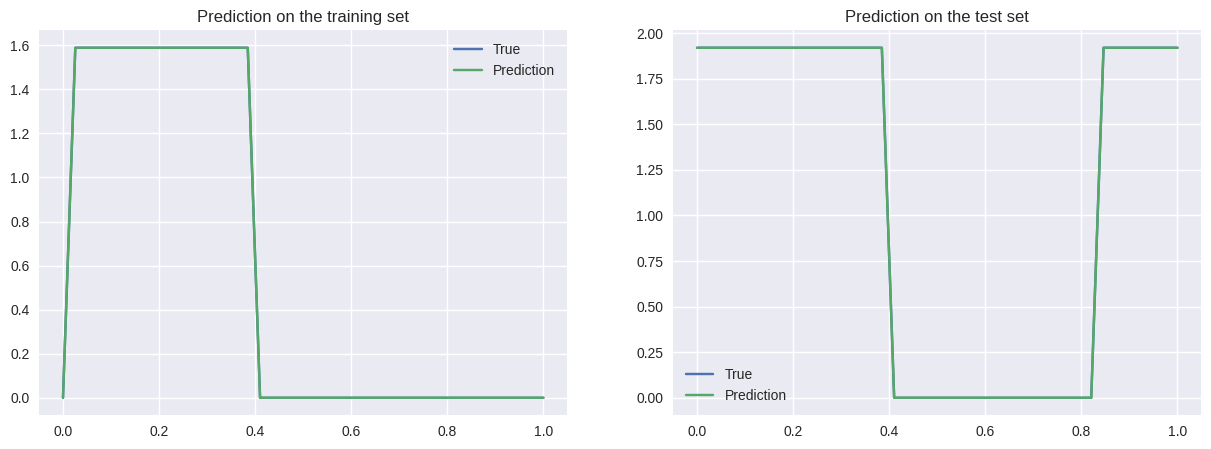

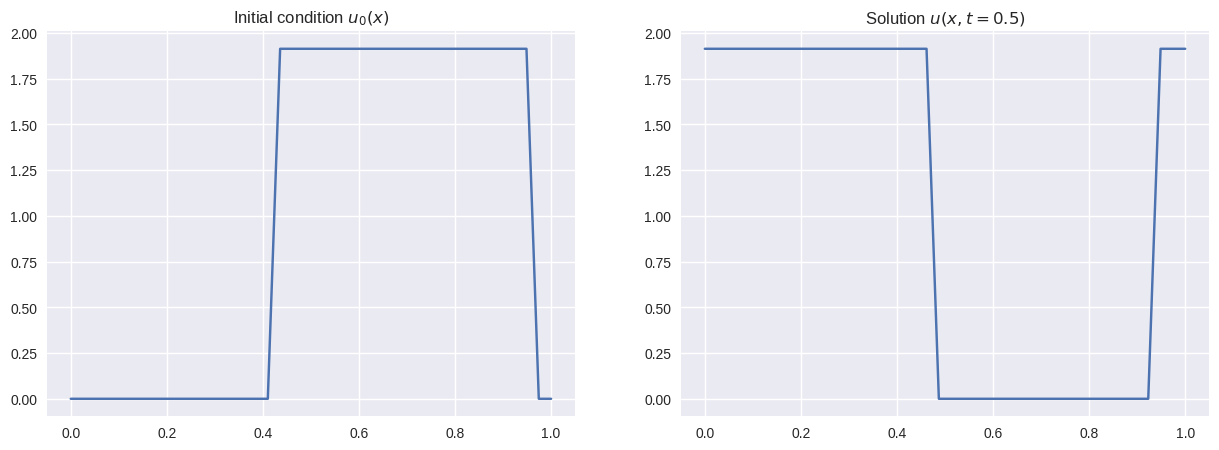

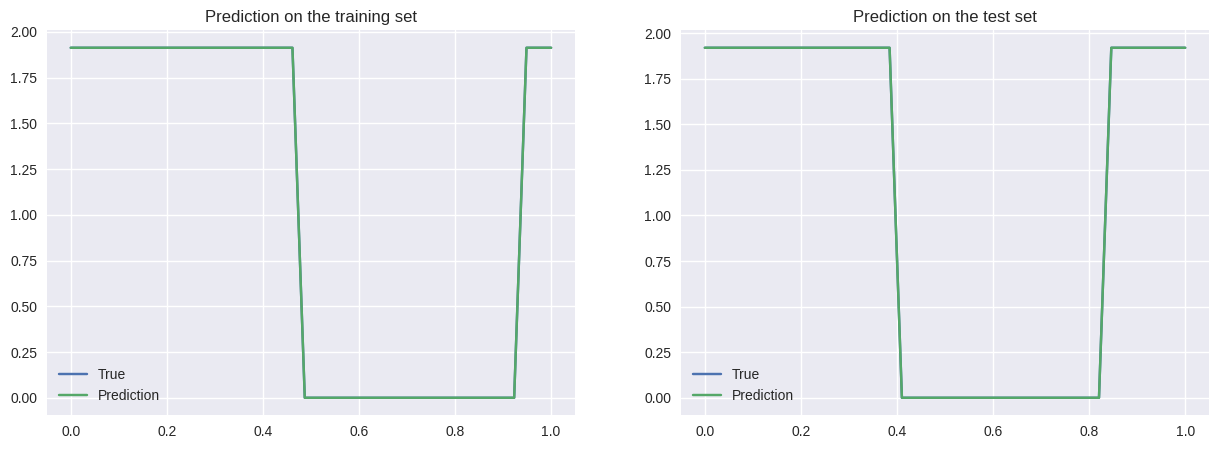

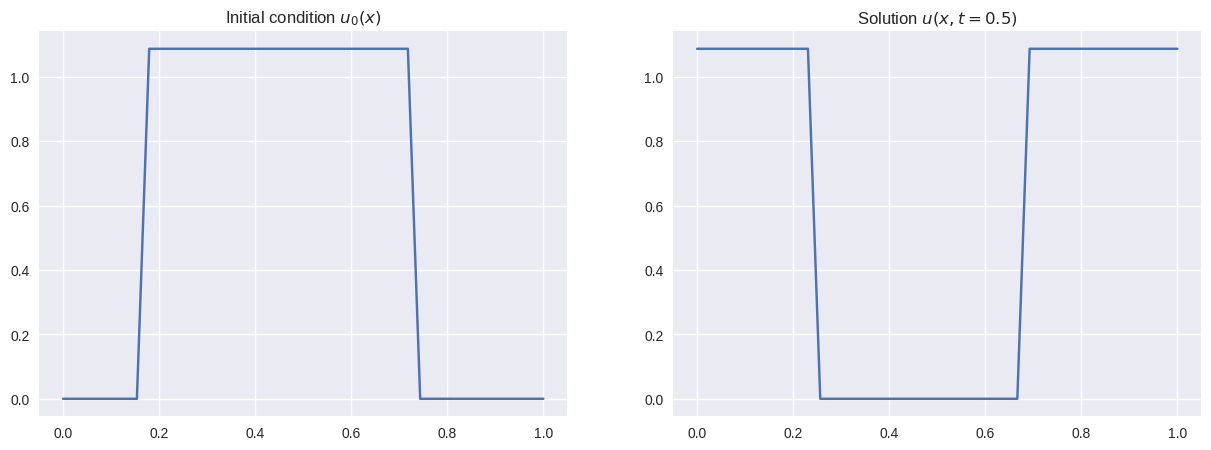

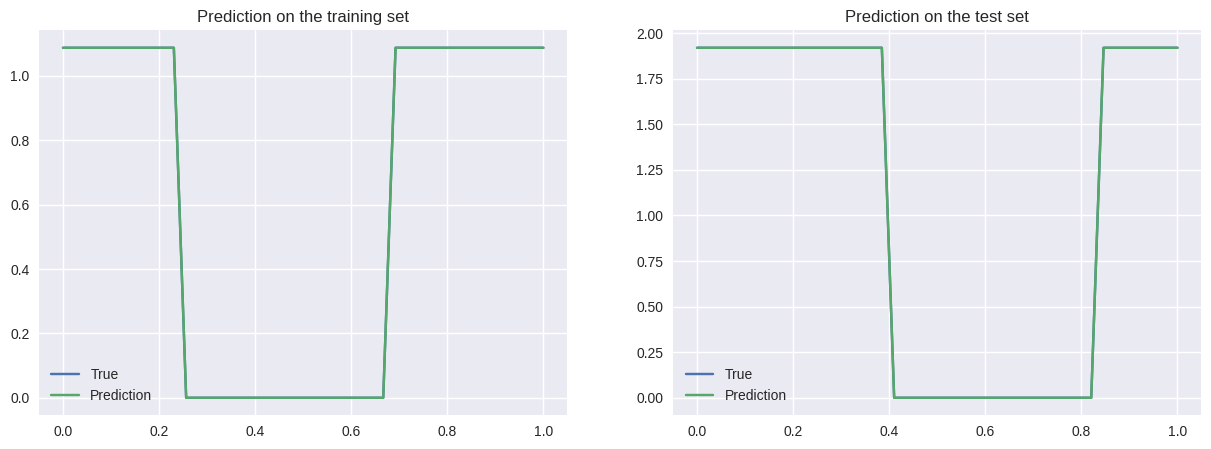

In [72]:
errors = []
for i in range(5):
    x_train, y_train, xt= get_data("train" + str(i) + ".npz")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
    ax1.plot(np.linspace(0,1, 40), x_train[idx])
    ax1.set_title(r"Initial condition $u_0(x)$")
    ax2.plot(np.linspace(0,1, 40), y_train[idx])
    ax2.set_title(r"Solution $u(x, t = 0.5)$")
    plt.show()
    
    model = LinearRegression()

    pred, pred_train, model = train_test(x_train, x_test, y_train, y_test, model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    
    idx = 20

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

    ax1.plot(np.linspace(0,1, 40), y_train[idx], label = "True")
    ax1.plot(np.linspace(0,1, 40), pred_train[idx], label = "Prediction")
    ax1.legend()
    ax1.set_title(r"Prediction on the training set")

    ax2.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
    ax2.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
    ax2.set_title(r"Prediction on the test set")
    ax2.legend()

    plt.show()
    
    errors.append(e)
    
    

In [54]:
np.mean(np.array(errors)*10**2), np.std(np.array(errors)*10**2)

(2.1548335677508058e-15, 7.357511040522431e-16)

## Polynomial Regression: quadratic

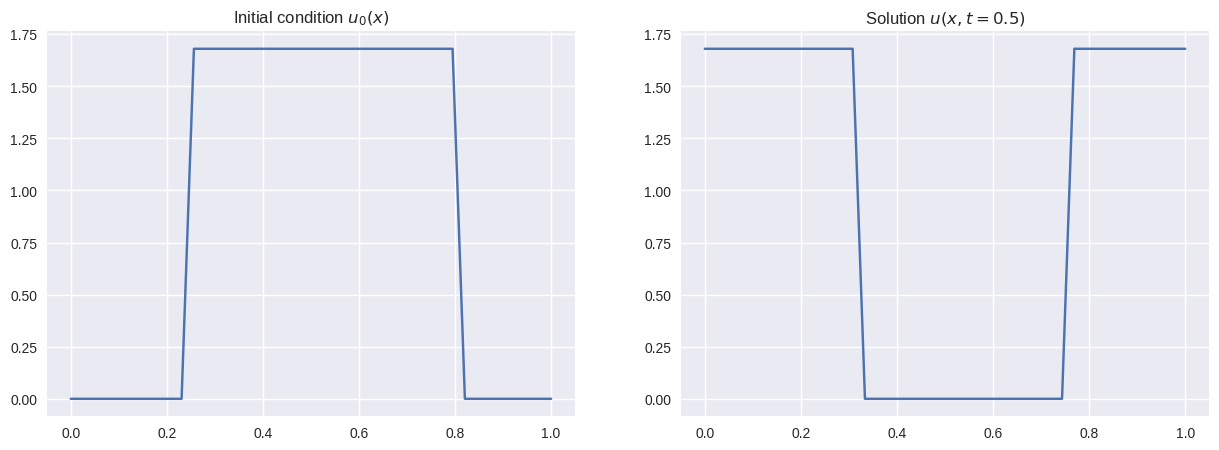

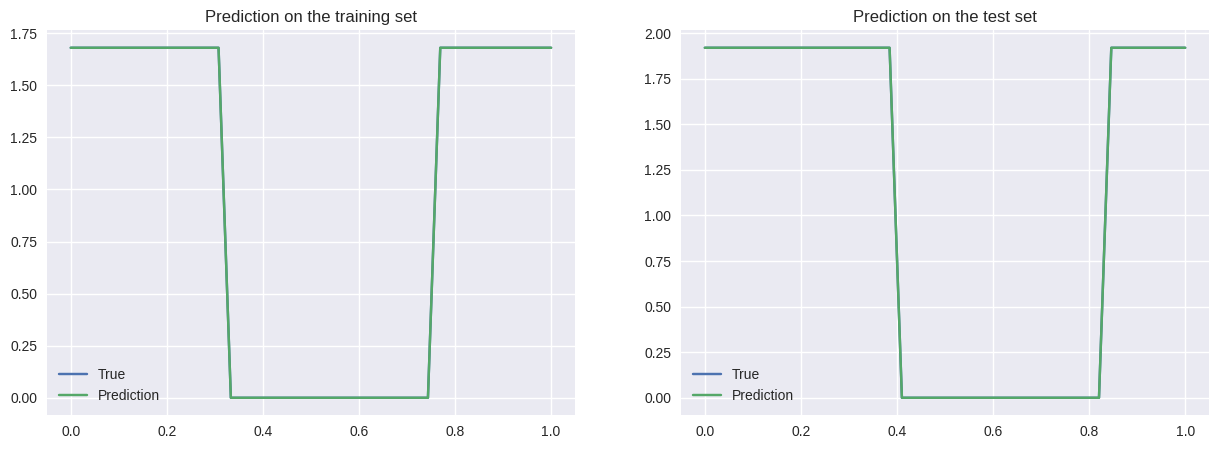

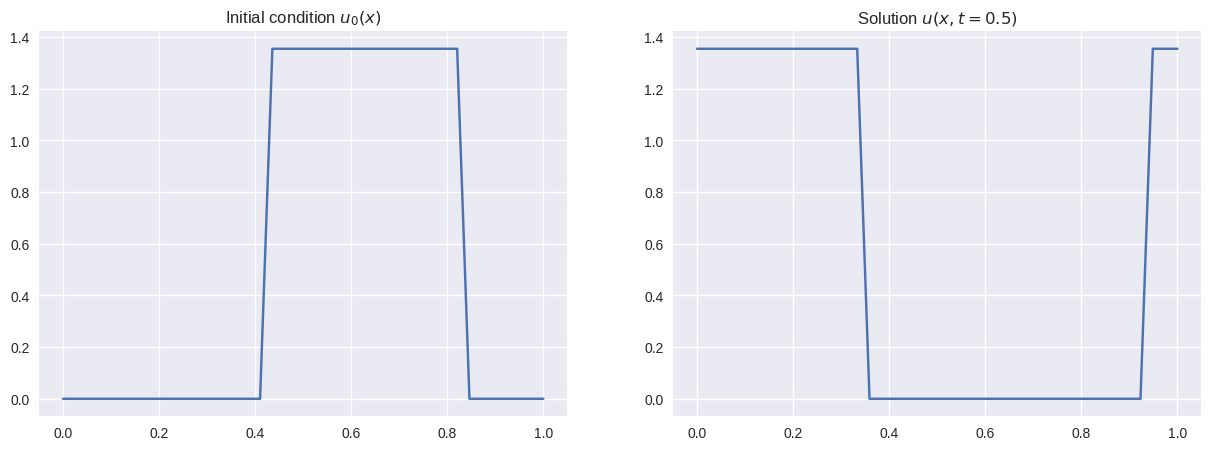

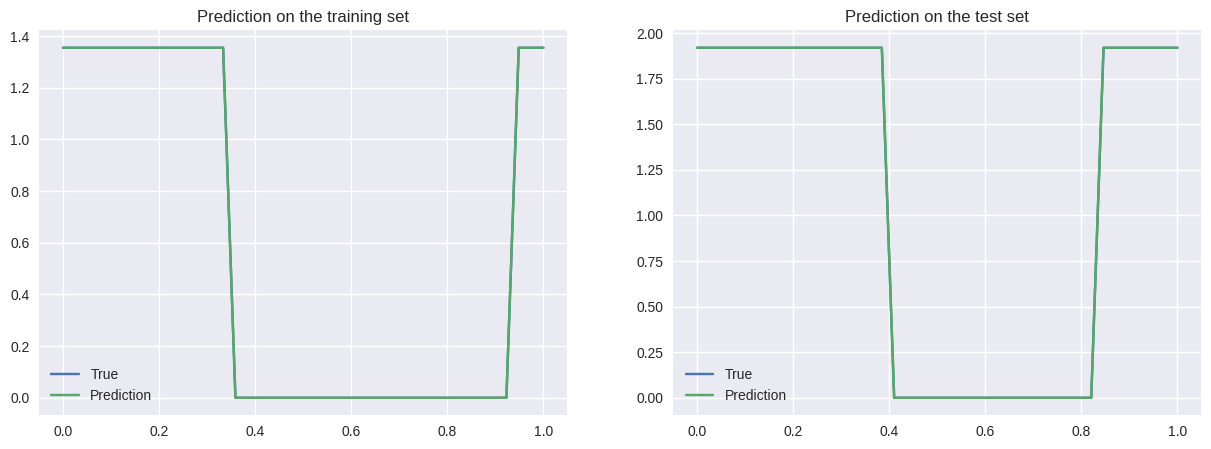

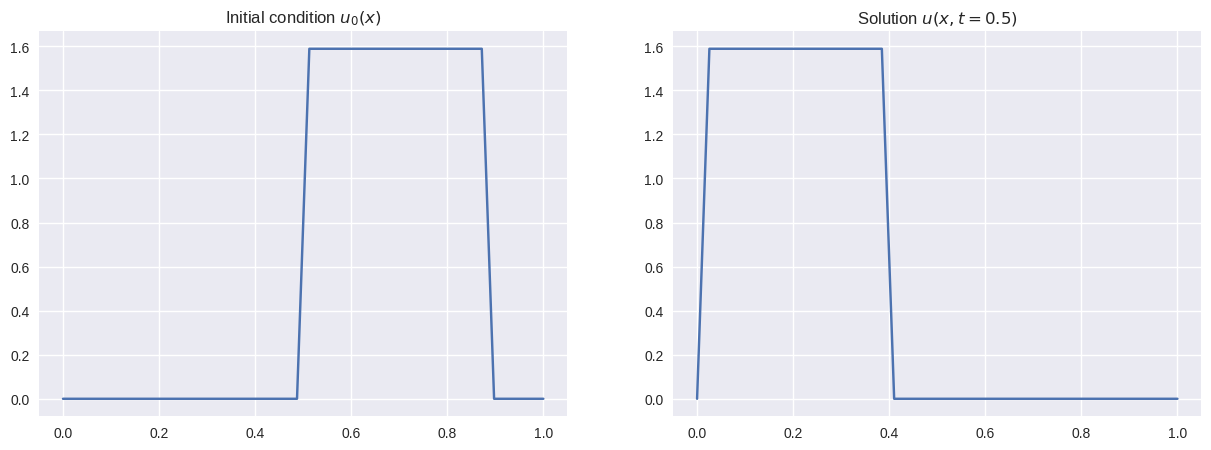

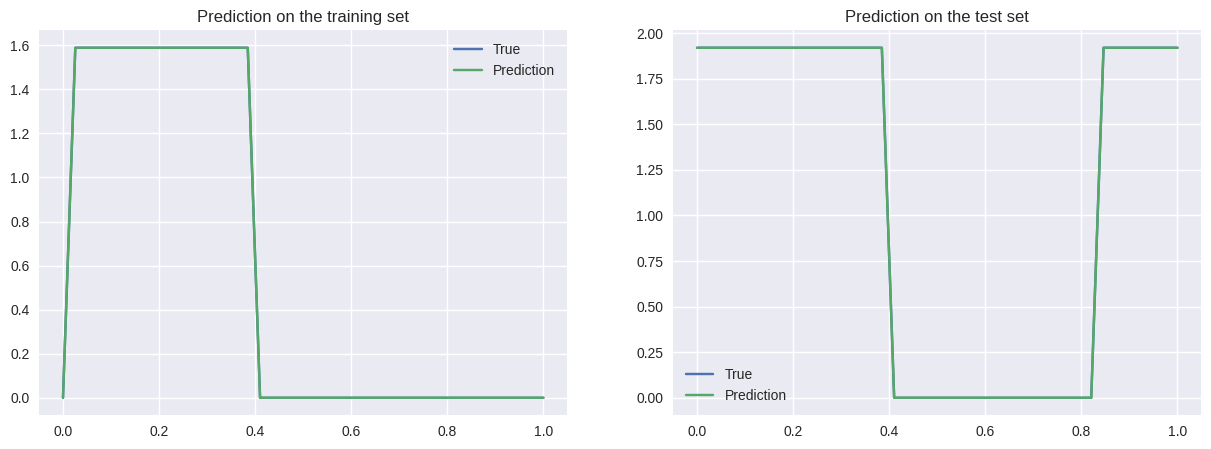

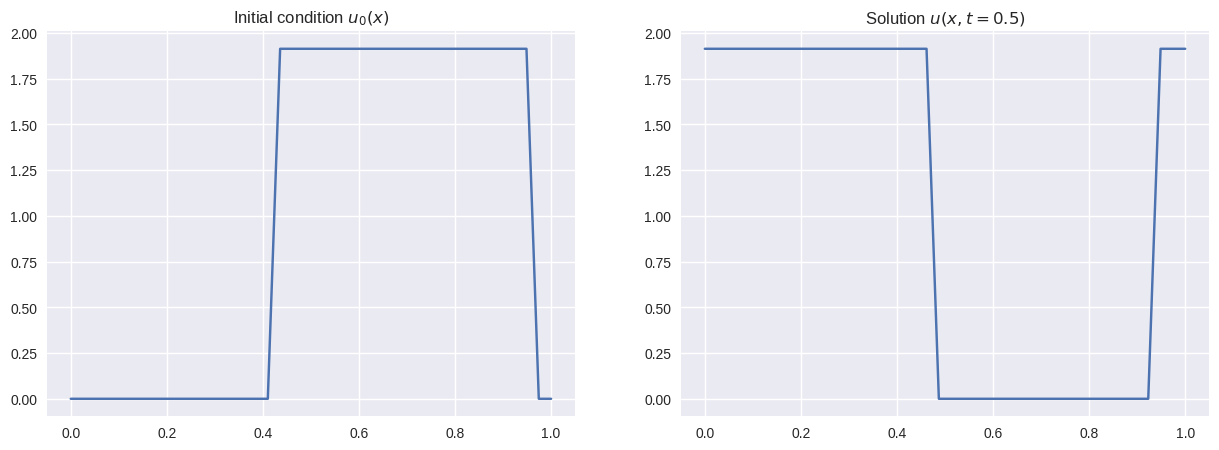

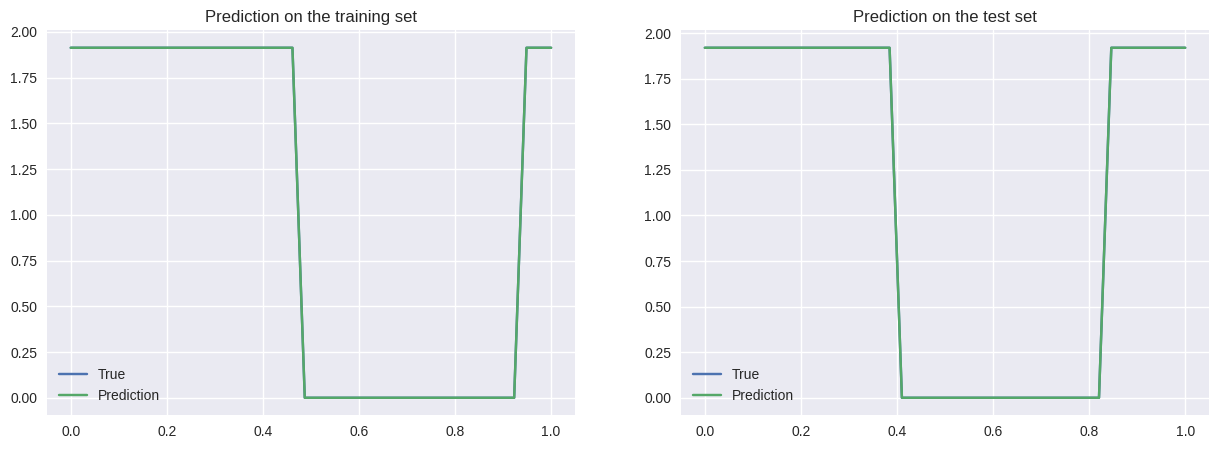

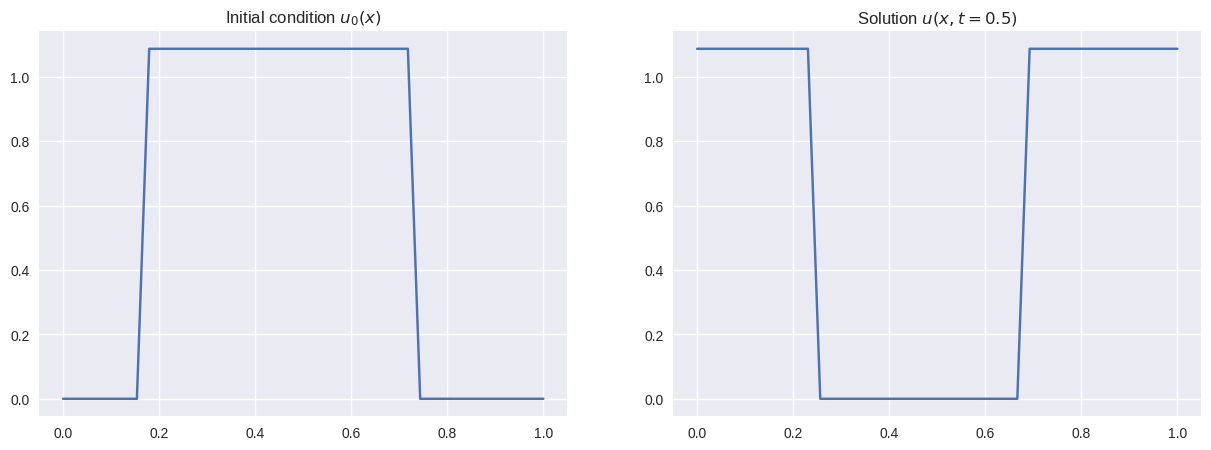

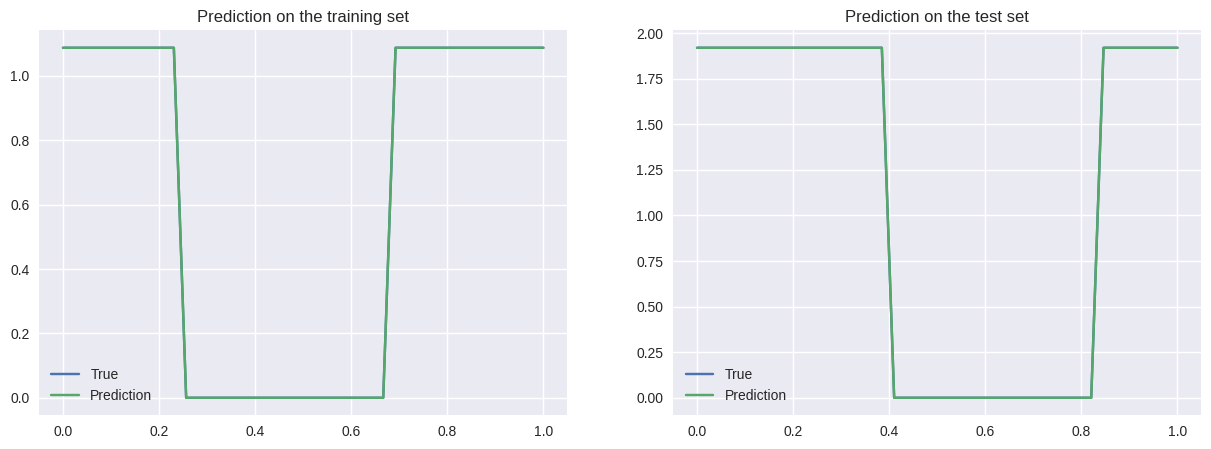

In [70]:
errors = []
poly = PolynomialFeatures(2)


for i in range(5):
    x_train, y_train, xt= get_data("train" + str(i) + ".npz")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
    ax1.plot(np.linspace(0,1, 40), x_train[idx])
    ax1.set_title(r"Initial condition $u_0(x)$")
    ax2.plot(np.linspace(0,1, 40), y_train[idx])
    ax2.set_title(r"Solution $u(x, t = 0.5)$")
    plt.show()
    
    model = LinearRegression()
    
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    pred, pred_train, model = train_test(x_train_poly, x_test_poly, y_train, y_test, model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    
    idx = 20

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

    ax1.plot(np.linspace(0,1, 40), y_train[idx], label = "True")
    ax1.plot(np.linspace(0,1, 40), pred_train[idx], label = "Prediction")
    ax1.legend()
    ax1.set_title(r"Prediction on the training set")

    ax2.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
    ax2.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
    ax2.set_title(r"Prediction on the test set")
    ax2.legend()

    plt.show()
    
    errors.append(e)

In [73]:
np.mean(np.array(errors)*10**2), np.std(np.array(errors)*10**2)

(2.154833567750806e-13, 7.35751104052243e-14)

## GP Regression: Matern

In [61]:
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessRegressor

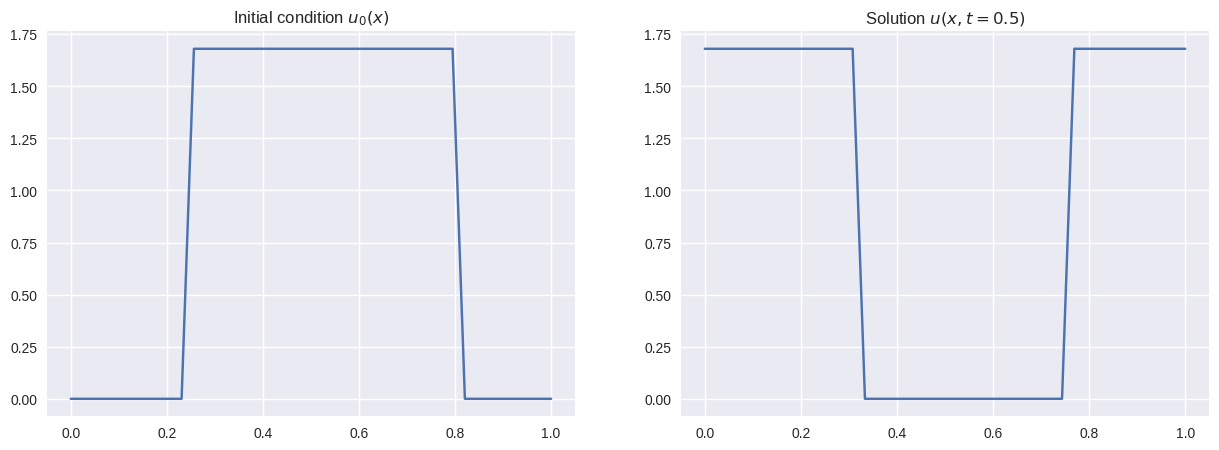

/home/matthieudarcy/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


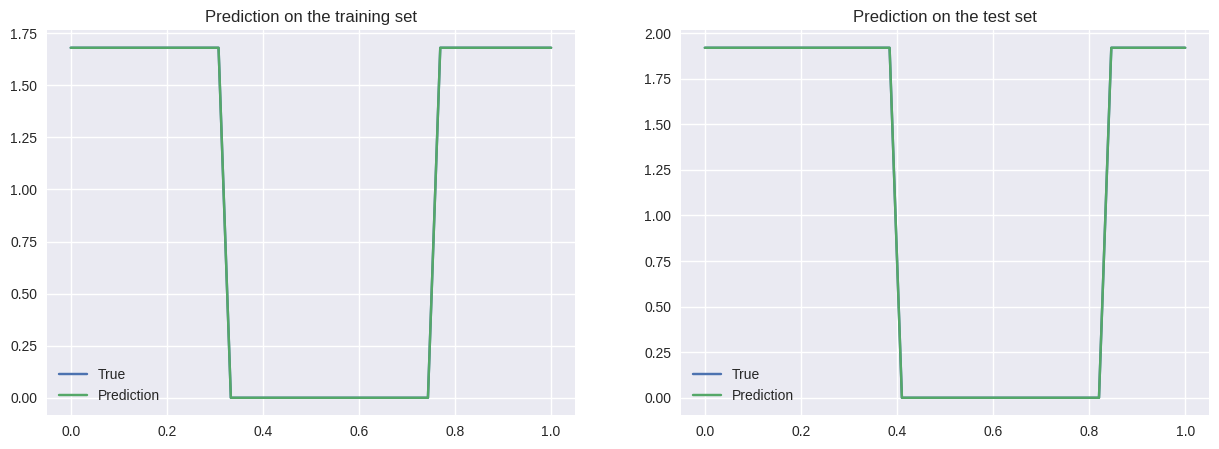

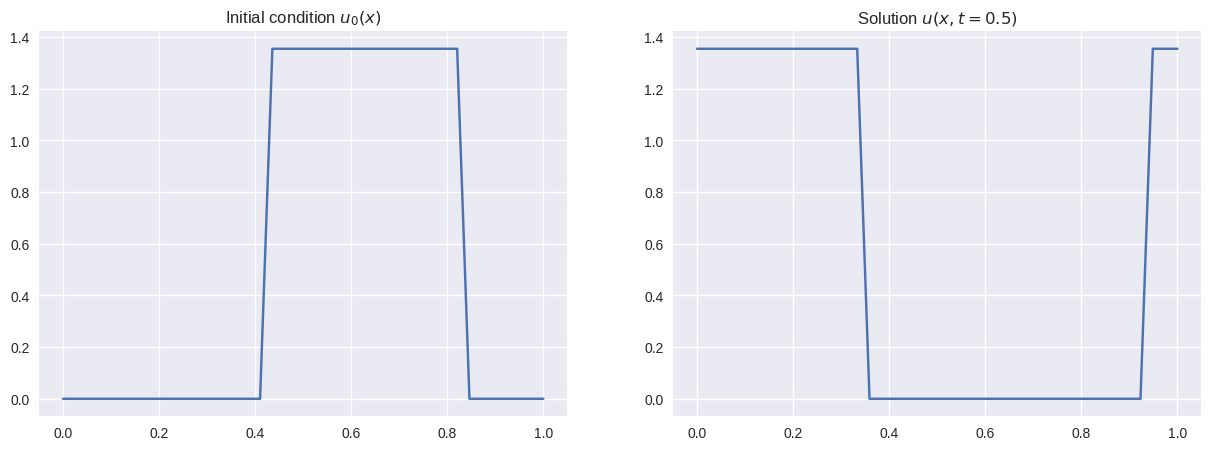

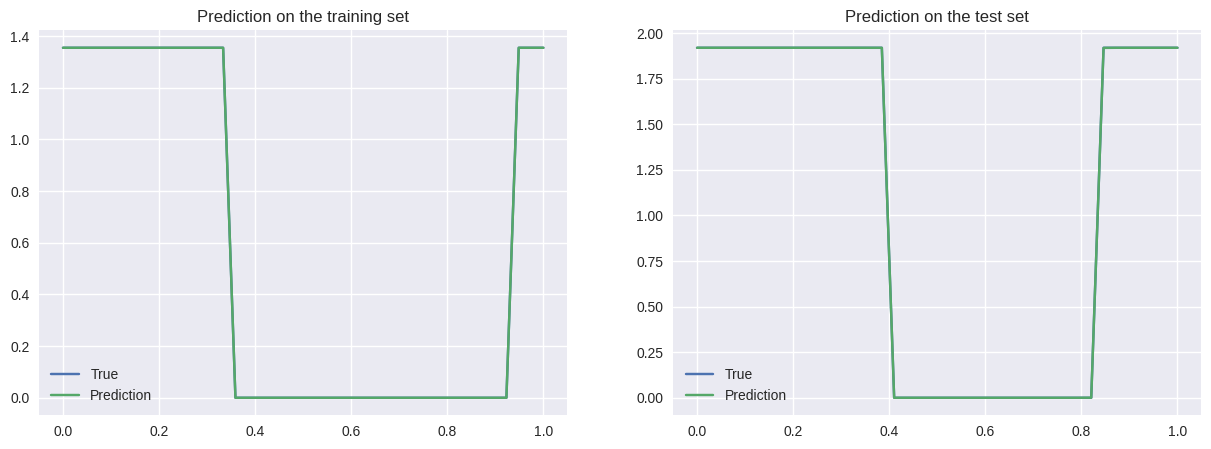

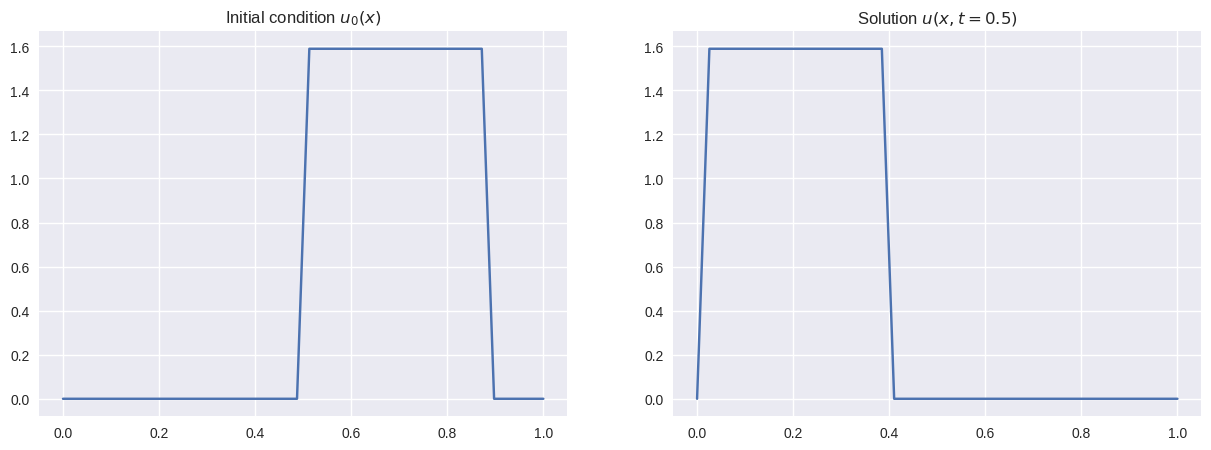

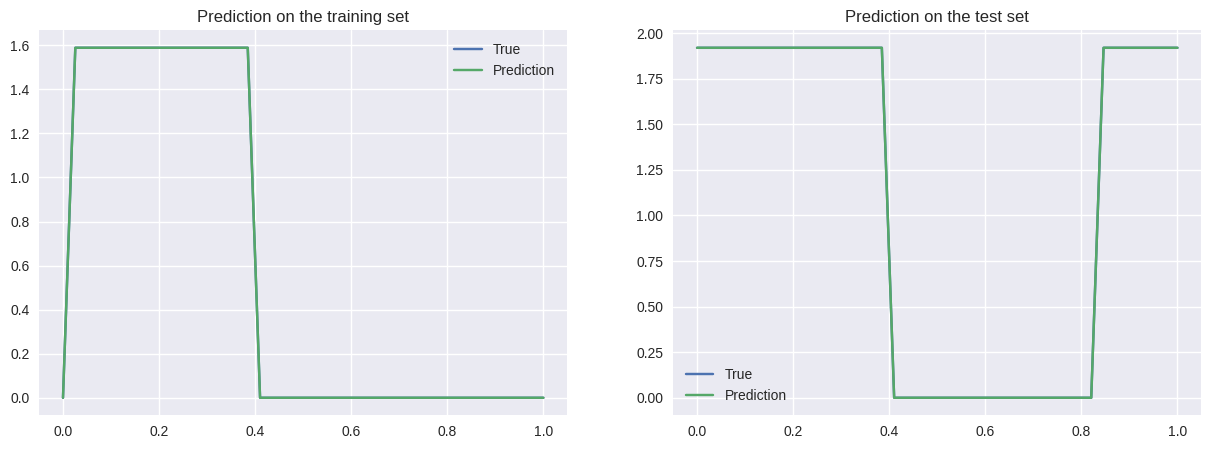

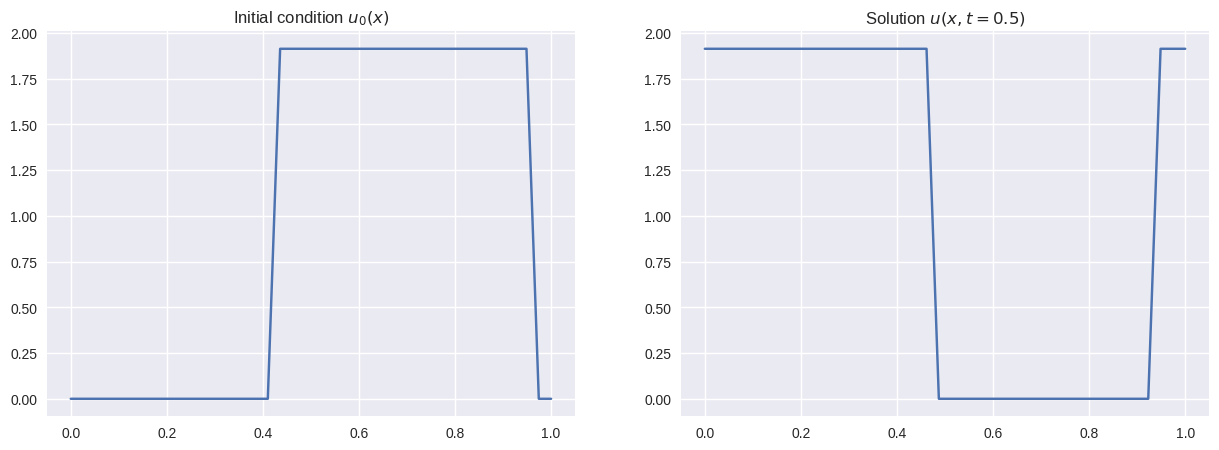

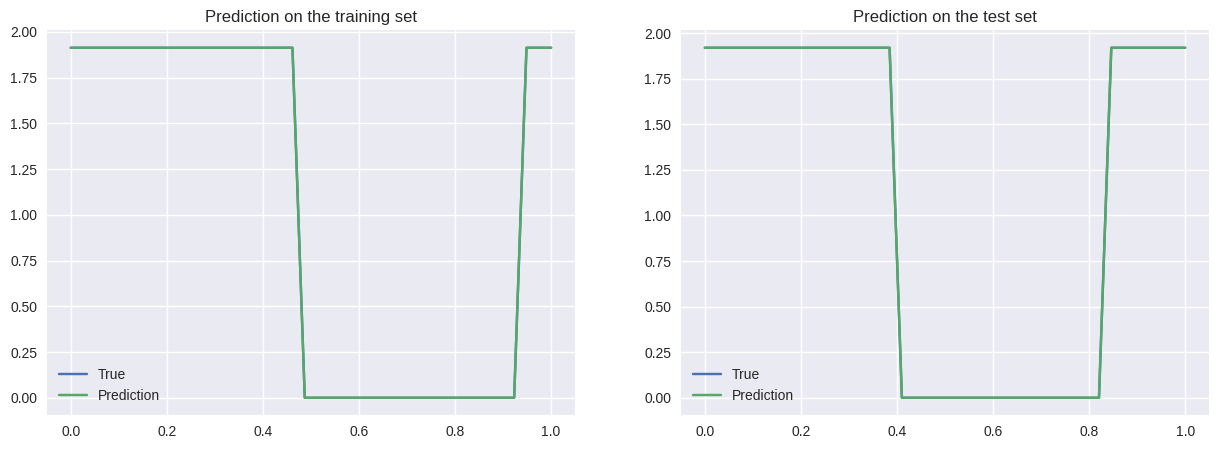

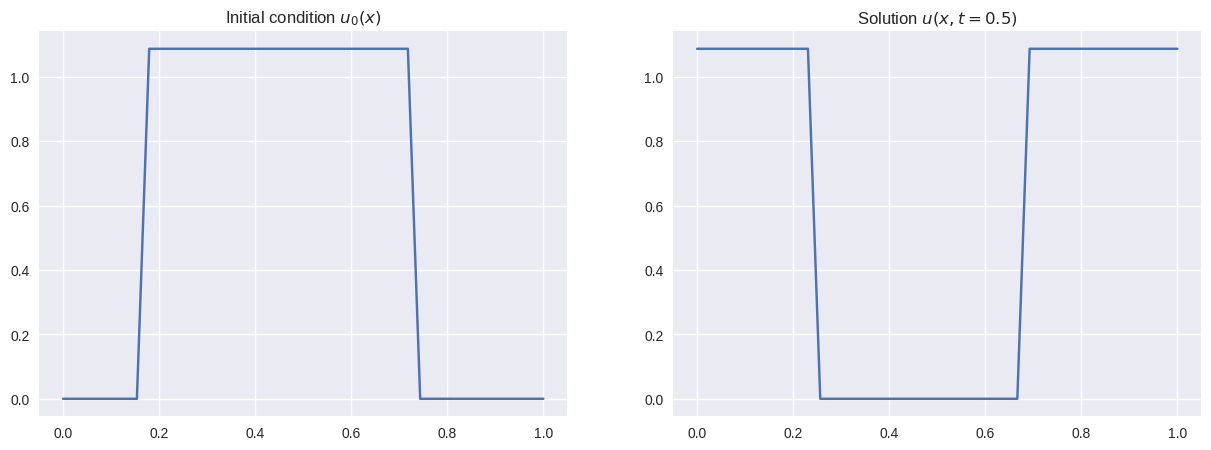

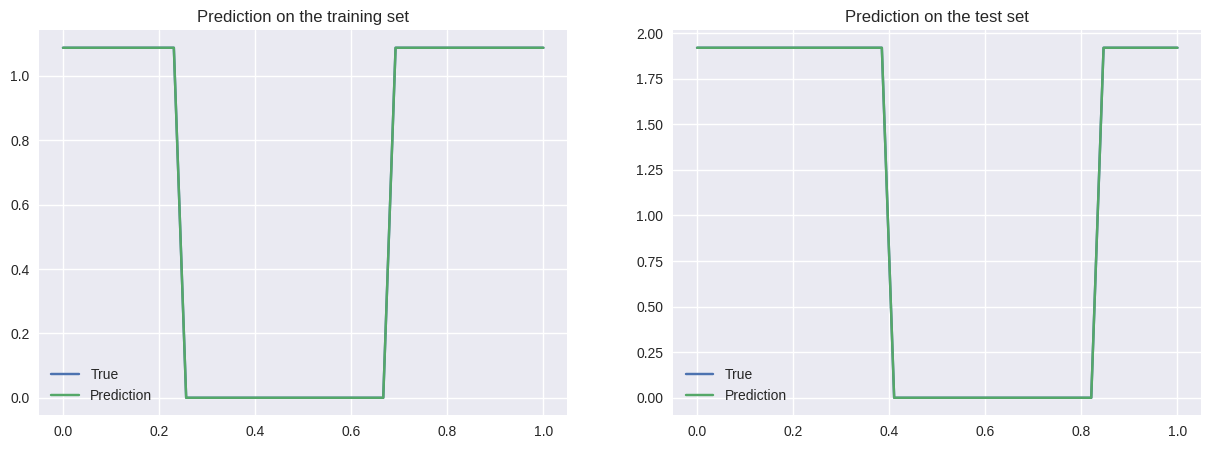

In [62]:
errors = []

kernel = Matern(nu = 2.5)
for i in range(5):
    x_train, y_train, xt= get_data("train" + str(i) + ".npz")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
    ax1.plot(np.linspace(0,1, 40), x_train[idx])
    ax1.set_title(r"Initial condition $u_0(x)$")
    ax2.plot(np.linspace(0,1, 40), y_train[idx])
    ax2.set_title(r"Solution $u(x, t = 0.5)$")
    plt.show()
    
    model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

    pred, pred_train, model = train_test(x_train, x_test, y_train, y_test, model)
    e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
    
    idx = 20

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

    ax1.plot(np.linspace(0,1, 40), y_train[idx], label = "True")
    ax1.plot(np.linspace(0,1, 40), pred_train[idx], label = "Prediction")
    ax1.legend()
    ax1.set_title(r"Prediction on the training set")

    ax2.plot(np.linspace(0,1, 40), y_test[idx], label = "True")
    ax2.plot(np.linspace(0,1, 40), pred[idx], label = "Prediction")
    ax2.set_title(r"Prediction on the test set")
    ax2.legend()

    plt.show()
    
    errors.append(e)

In [69]:
np.mean(np.array(errors)*10**2), np.std(np.array(errors)*10**2)

(0.0027509521790001186, 0.0008145823054754301)